# APS 3 
### Caroline Chaim, Rafael Lima, Andre Melo

## Imports

In [1]:
import graph_tool_extras as gte
import netpixi
from graph_tool import draw
import distribution as dst
import matplotlib.pyplot as plt


In [2]:
PATH = './archive/chess_games.csv'

## Funções

##### Funcao de get_or_add_vertix tem como principal objecitvo adiconar vertices no grafo sem carregar na memoria.

In [3]:
def get_or_add_vertex(g, id):
    u = g.vertex_by_id(id)
    if u is None:
        g.add_vertex_by_id(id)

## Leitura do arquivo e montagem do grafo

In [4]:
#Usando somente os primeros 200000 jogos.
with open(PATH) as file:
    g = gte.Graph(directed=False)
    i = 0

    next(file)

    for line in file:


        parts = line.split(',')

        
        #print (parts [1], parts[0])

        if parts[4] == "2016.07.01":
            
        
            get_or_add_vertex(g,parts[1])
            get_or_add_vertex(g,parts[2])    
            g.add_edge_by_ids(parts[1], parts[2])


        i += 1
        #print(parts[4])
    
        #if i == 5000:
        if i == 350000:
            break


## Calculo de vertices

In [5]:
r=0
for u in g.vertices():
    r += 1
print(r)

40285


## Calculo de artesas

In [6]:
r=0
for u in g.edges():
    r += 1
print(r)

198207


## Limpeza do grafo e criacao do arquivo .gz

In [7]:
gte.save(g, 'chess.net.gz')

In [8]:
layout = draw.sfdp_layout(g)

In [9]:
g = gte.clean(g)

In [10]:
gte.move(g, layout)
gte.save(g, 'chess.net.gz')

## Visalizacao do grafo

In [11]:
r = netpixi.render('chess.net.gz', infinite=True)

## Modificacoes de artesas e vertices do grafo

In [24]:
r.vertex_default(size=4, bwidth=1)


In [25]:
r.edge_default(width=1)

## Calculo de desidade e trasitividade

In [14]:
g.density()

0.025262

In [15]:
g.transitivity()

3.627944

## Distribuicao de Degrees

In [16]:
degrees = g.get_total_degrees()

In [17]:
degrees.describe()

count    39546.000000
mean         9.989733
std         14.900676
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        348.000000
dtype: float64

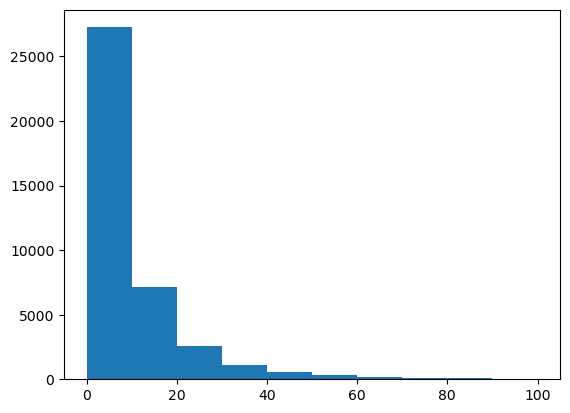

In [18]:
plt.hist(degrees,bins=[0,10,20,30,40,50,60,70,80,90,100]);
plt.savefig('hist.png')

In [19]:
dst.not_normal(degrees)

0.0

In [20]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit


(False, 0.04384674828264698)

In [21]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(True, 0.0018002613025117173)

## Distribuicao de distancias

In [22]:
g.describe_distances()

count    1.563886e+09
mean     5.434439e+00
std      1.110129e+00
min      0.000000e+00
max      1.300000e+01
dtype: float64

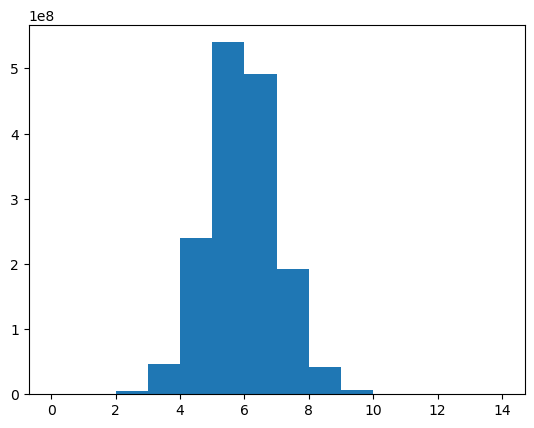

In [23]:
g.hist_distances()